In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Checking for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data1 = data.rename({'R&D Spend':'RDS', 'Administration':'administration', 'Marketing Spend':'marketing_spend', 'State':'state', 'Profit':'profit'}, axis = 1)
data1

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data1[data1.duplicated()] # No duplicated data

,RDS,administration,marketing_spend,state,profit


In [7]:
data1.describe()

,RDS,administration,marketing_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Matrix

In [8]:
data1.corr()

,RDS,administration,marketing_spend,profit
RDS,1.000000,0.241955,0.724248,0.972900
administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

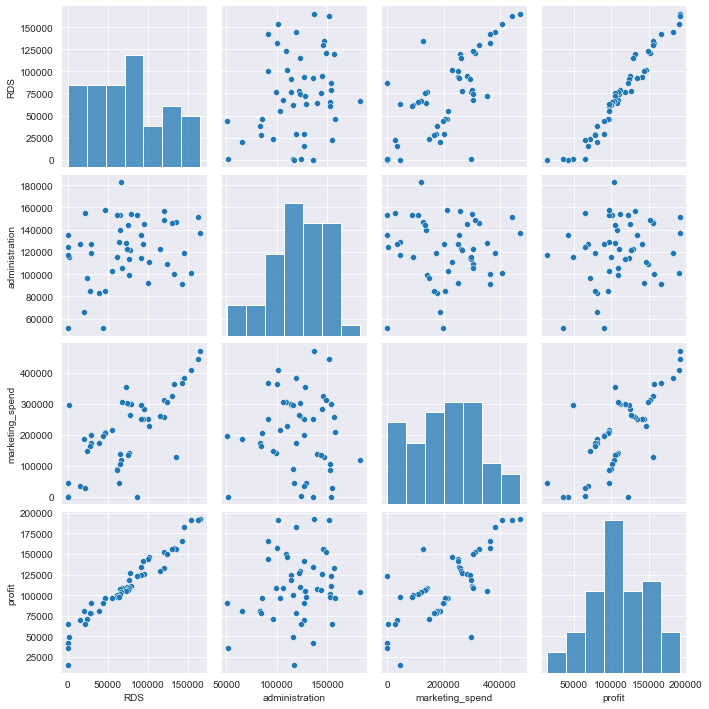

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building

In [10]:
model = smf.ols("profit~RDS+administration+marketing_spend", data = data1).fit()

In [11]:
#Finding coefficient parameters
model.params

Intercept          50122.192990
RDS                    0.805715
administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept           7.626218
 RDS                17.846374
 administration     -0.525507
 marketing_spend     1.655077
 dtype: float64,
 Intercept          0.00000
 RDS                0.00000
 administration     0.60176
 marketing_spend    0.10472
 dtype: float64)

In [13]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [14]:
ml_a = smf.ols('profit~administration', data = data1).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
administration    1.419493
dtype: float64 
 Intercept         0.003824
administration    0.162217
dtype: float64


In [15]:
ml_m = smf.ols('profit~marketing_spend', data = data1).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept          7.808356
marketing_spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64


In [16]:
ml_am = smf.ols('profit~administration+marketing_spend', data = data1).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept          1.142741
administration     2.467779
marketing_spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
administration     1.729198e-02
marketing_spend    9.727245e-11
dtype: float64


# Calculating VIF

In [17]:
rsq_r = smf.ols("RDS~administration+marketing_spend", data = data1).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols("administration~RDS+marketing_spend", data = data1).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols("marketing_spend~RDS+administration", data = data1).fit().rsquared
vif_m = 1/(1-rsq_m)

# Putting the values in Dataframe format
d1 = {'Variables':['RDS','administration','marketing_spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,administration,1.175091
2,marketing_spend,2.326773


# Residual Analysis

## Test for Normality for Residuals (Q-Q Plot)

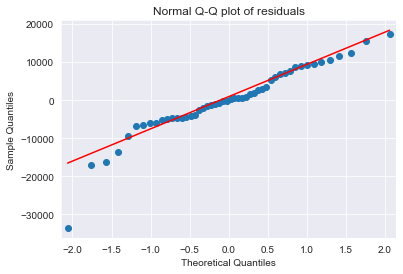

In [18]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

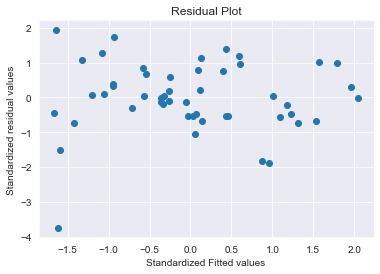

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals vs Regressors

eval_env: 1


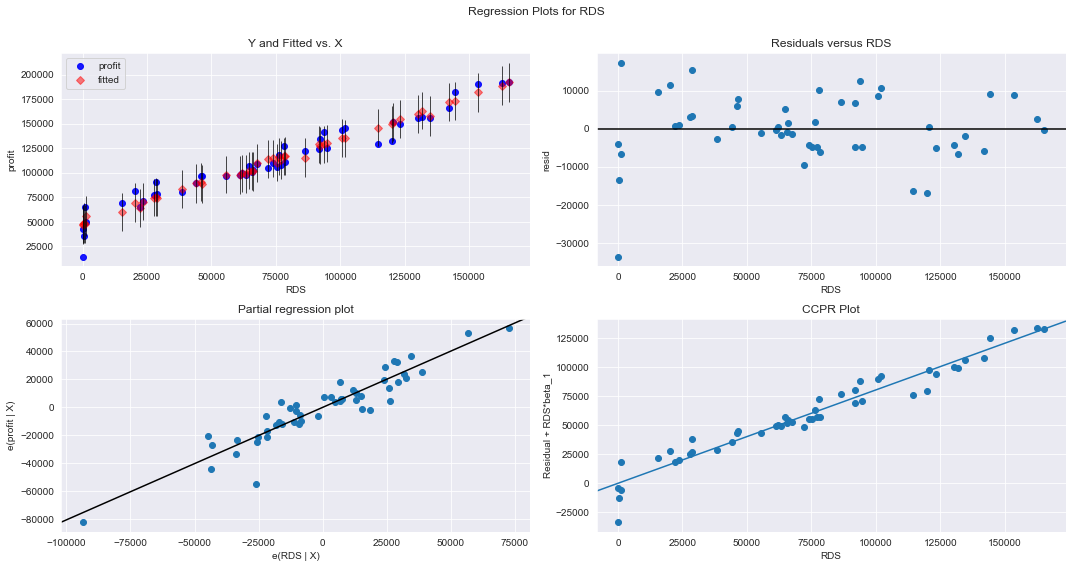

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig = fig)
plt.show()

eval_env: 1


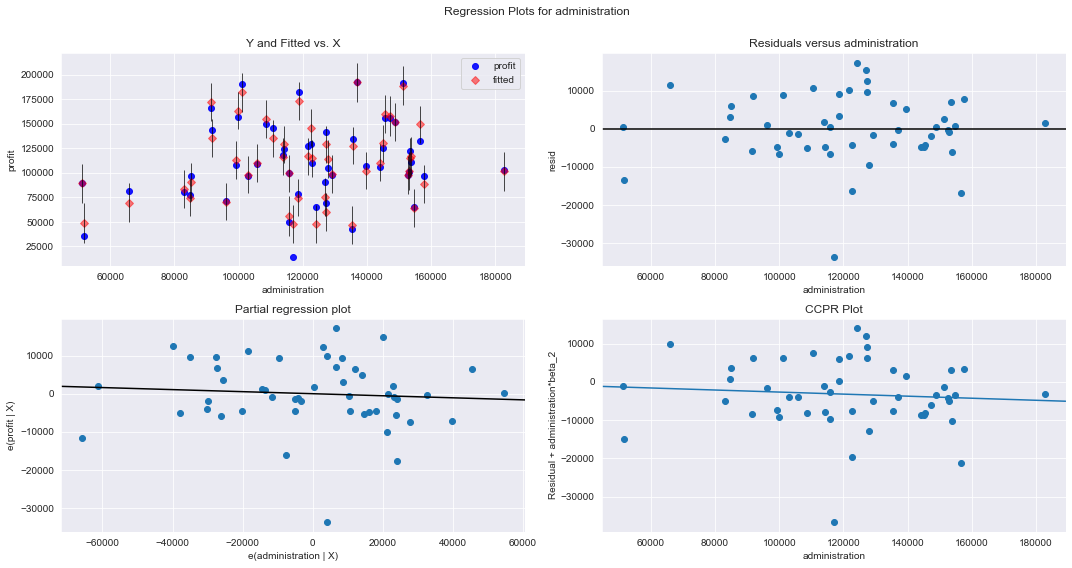

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "administration", fig = fig)
plt.show()

eval_env: 1


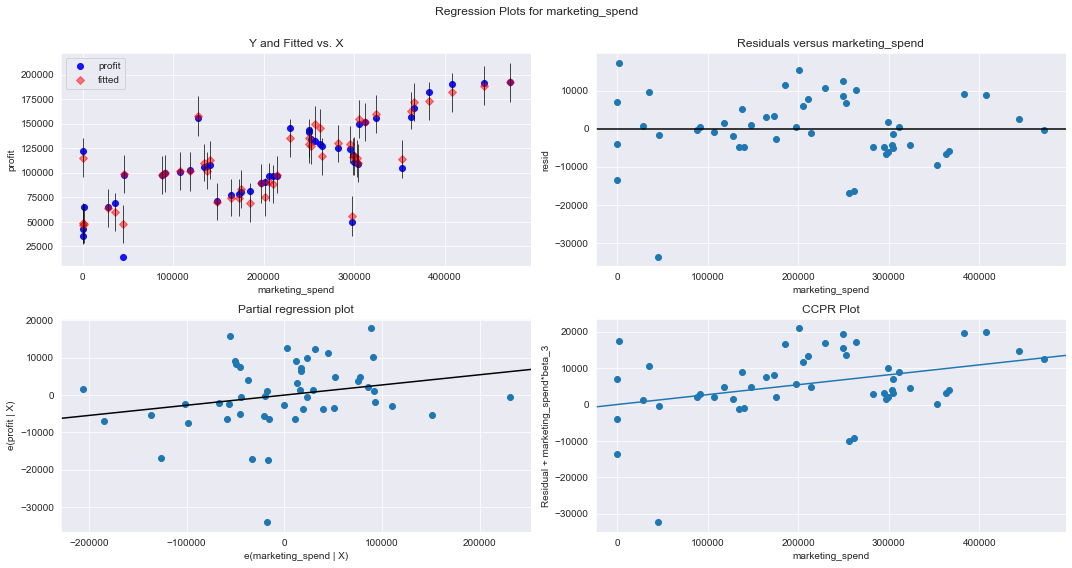

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing_spend", fig = fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook's Distance

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

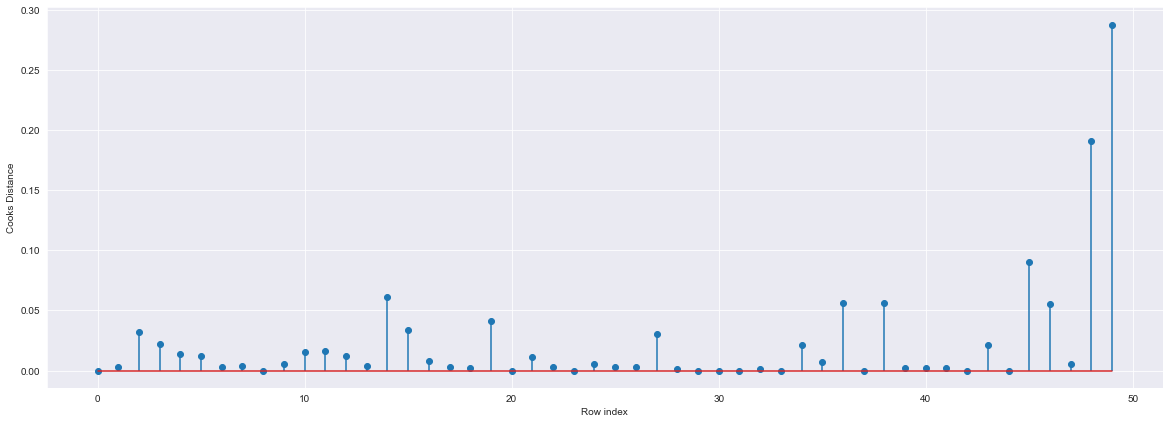

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

# High Influence Points

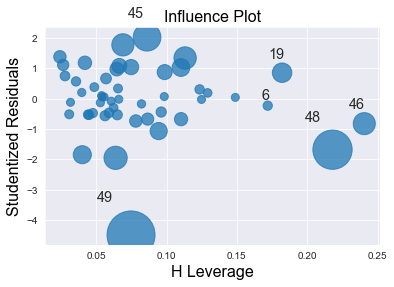

In [28]:
influence_plot(model)
plt.show()

In [29]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [30]:
data1[data1.index.isin([46])]

,RDS,administration,marketing_spend,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75


In [31]:
#See the differences in RDS and other variable values
data1.head()

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the Model

In [32]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[46]],axis=0).reset_index(drop=True)
data2

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [33]:
while np.max(c)>0.5 :
    model=smf.ols("profit~RDS+administration+marketing_spend",data = data1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("profit~RDS+administration+marketing_spend",data = data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9507459940683246


In [34]:
final_model.rsquared

0.9507459940683246

In [35]:
data1

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Cook's Distance

In [36]:
model_influence_a = final_model.get_influence()
(c_a, _) = model_influence_a.cooks_distance

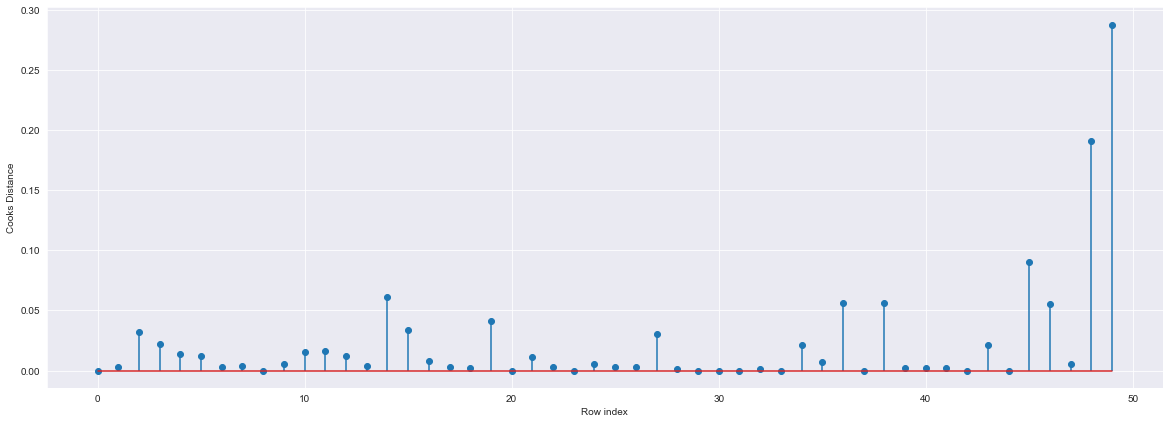

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_a,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [38]:
#index of the data points where c is more than .5
(np.argmax(c_a),np.max(c_a))

(49, 0.2880822927543267)

In [39]:
#Drop 49 observations
data = data1.drop(data1.index[[46]], axis = 0)

In [40]:
data

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
#Reset the index and re arrange the row values
data2 = data1.reset_index()

In [42]:
data3 = data2.drop(['index'],axis=1)

In [43]:
data3

,RDS,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
#Build the model on the new data
final_ml_a = smf.ols('RDS~administration+marketing_spend+profit', data = data3).fit()

In [45]:
#Again check for influencers
model_influence_a = final_ml_a.get_influence()
(c_a, _) = model_influence_a.cooks_distance

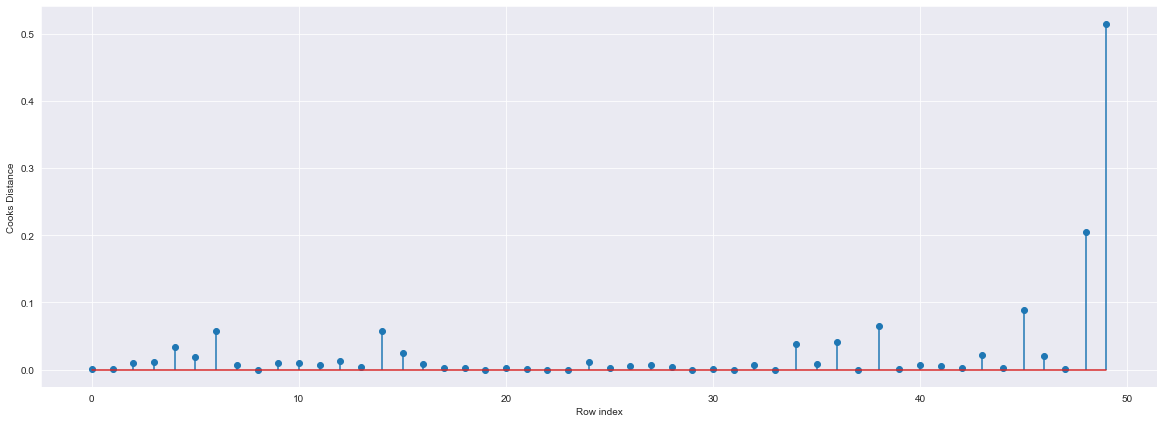

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_a,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [47]:
#index of the data points where c is more than .5
(np.argmax(c_a),np.max(c_a))

(49, 0.514612675875068)

In [48]:
#Check the accuracy of the mode
final_ml_a = smf.ols('RDS~administration+marketing_spend+profit',data = data1).fit()

In [49]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9488830971212534, 1073.6286707189656)

# Predicting for New Data

In [50]:
# say New data for prediction is
new_data = pd.DataFrame({'RDS':70000,"administration":90000,"marketing_spend":140000},index=[0])
new_data

,RDS,administration,marketing_spend
0,70000,90000,140000


In [51]:
final_model.predict(new_data)

0    107920.738401
dtype: float64

In [52]:
final_model.predict(new_data.iloc[0:5,])

0    107920.738401
dtype: float64

In [53]:
pred_y = final_model.predict(new_data)

In [54]:
pred_y

0    107920.738401
dtype: float64